# 静态库编译

## 代码准备

### 头文件

```C++
#ifndef YQ_ADD_H
#define YQ_ADD_H
extern int yq_add(int, int);
#endif
```

### 实现文件

```C++
#include "add.h"
int yq_add(int p1, int p2){
    return p1 + p2;
}
```

## lib帮助

- lib命令工具就是用来创建静态库的工具，在woindow控制台直接输入命令，会答应该命令的使用帮助。

```C++

C:\Users\gaoke>lib
Microsoft (R) Library Manager Version 14.24.28319.0
Copyright (C) Microsoft Corporation.  All rights reserved.

用法: LIB [选项] [文件]

  选项:

   /DEF[:文件名]
   /ERRORREPORT:{NONE|PROMPT|QUEUE|SEND}
   /EXPORT:符号
   /EXTRACT:成员名
   /INCLUDE:符号
   /LIBPATH:目录
      /LINKREPRO:dir
      /LINKREPROTARGET:filename
   /LIST[:文件名]
   /LTCG
   /MACHINE:{ARM|ARM64|EBC|X64|X86}
   /NAME:文件名
   /NODEFAULTLIB[:库]
   /NOLOGO
   /OUT:文件名
   /REMOVE:成员名
   /SUBSYSTEM:{BOOT_APPLICATION|CONSOLE|EFI_APPLICATION|
         EFI_BOOT_SERVICE_DRIVER|EFI_ROM|EFI_RUNTIME_DRIVER|
         NATIVE|POSIX|WINDOWS|WINDOWSCE}[,#[.##]]
   /VERBOSE
   /WX[:NO]
```

- 基本使用的选项：
    1. `/OUT:文件名`：指定输出的静态库文件名
    2. `/MACHINE:{ARM|ARM64|EBC|X64|X86}`:指定CPU结构类型

## 编译脚本

- 这里先编译在构建
    - 编译使用cl工具，构建使用lib工具

```
CL_ARGS    = /EHsc  \
             /MD \
             /source-charset:utf-8  \
             /execution-charset:utf-8 \
             /nologo

LINK_ARGS  = /MACHINE:X64 /NOLOGO

OUTFILE    = add.dll
LIBFILE    = add.lib
SOURCE     = add.c
OBJS       = add.obj

$(OUTFILE):$(SOURCE)
# 编译
    @cl /c $(CL_ARGS) /Fo:$(OBJS)  $(SOURCE)  /nologo
# 静态库
    @lib $(LINK_ARGS) /OUT:$(LIBFILE) $(OBJS) 

clean:
    @del *.obj *.dll *.pdb *.ilk *.exe *.lib 2>/Nul


```

- 编译指令：
    - `nmake clean`
    - `nmake`

- 编译以后，产生lib文件
    - `add.lib`

- lib文件的格式COFF文件。
    - Common Object File Format
    - 本质该是是目标文件，这一点与Linux下的静态一样，Linux静态库实际就是目标文件，或者是多个目标文件的归档文件`.a`

# 静态库调用

## 当目标文件使用

### 调用代码

```C++
#include <stdio.h>
#include "add.h"

int main(int argc, char **argv){
    printf("计算你结果：%d\n", yq_add(45,55));
}

```

### 编译脚本

- 为了简单编写成bat脚本文件：
    -``

```python
@rem echo off
@echo 切换到UTF-8编码...
@chcp 65001  >/Nul
@echo 清空历史编译文件...
@nmake /NOLOGO clean >/Nul
@echo 编译静态库...
@nmake /NOLOGO >/Nul

@echo 编译调用静态库的程序...
# 注意/MD选项与lib编译的/MD选项保持一致
@cl /nologo  /MD /Fe:main.exe call_add_1.c  add.lib >/Nul
@echo 执行程序...
@main

```

## 使用`#pragma`加载

### 调用代码

```C++
#include <stdio.h>
#include "add.h"

#pragma comment(lib, "add.lib")

int main(int argc, char **argv){
    printf("计算你结果：%d\n", yq_add(45,55));
}

```

### 编译脚本

- 为了简单编写成bat脚本文件：
    -``

```python
@rem echo off
@echo 切换到UTF-8编码...
@chcp 65001  >/Nul
@echo 清空历史编译文件...
@nmake /NOLOGO clean >/Nul
@echo 编译静态库...
@nmake /NOLOGO >/Nul
@echo 编译调用静态库的程序...
@cl /nologo  /MD /Fe:main.exe call_add_2.c >/Nul
@echo 执行程序...
@main

```

--------

# 附录

## 使用dumpbin

- 使用dumpbin查看COFF文件：
    - `dumpbin add.lib`

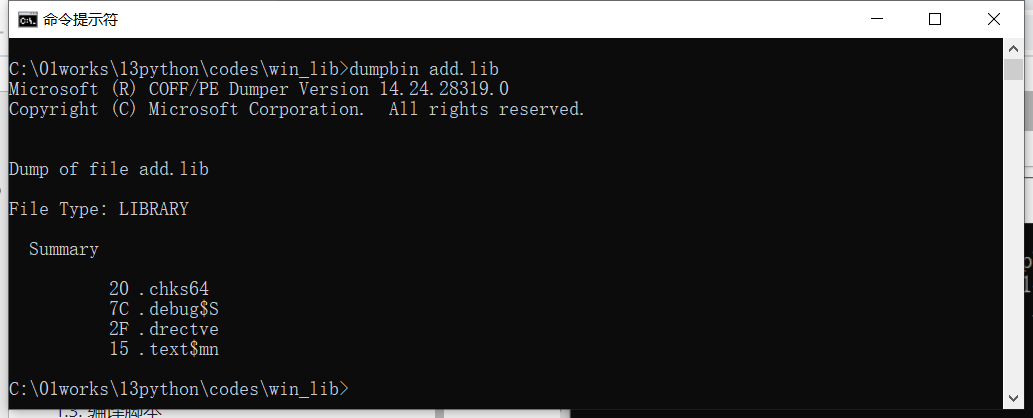

- 使用dumpbin查看obj文件
    - `dumpbin add.obj`

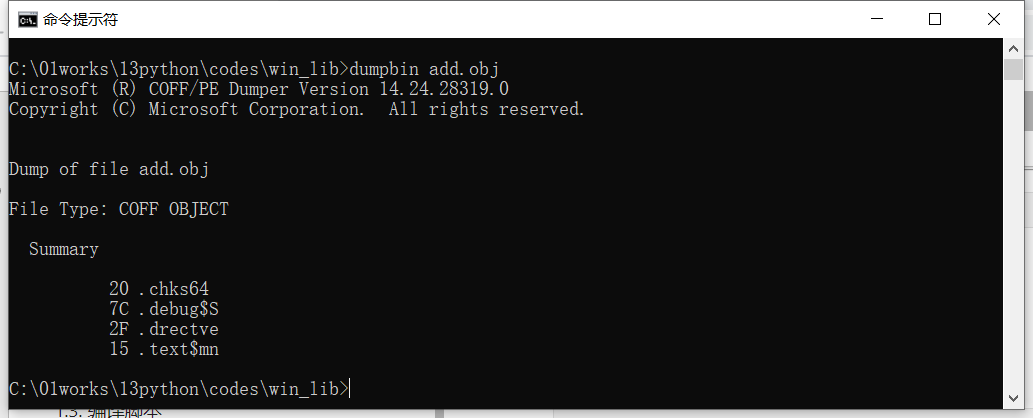

- 使用dumpbin查看PE执行文件格式
    - `dumpbin main.exe`

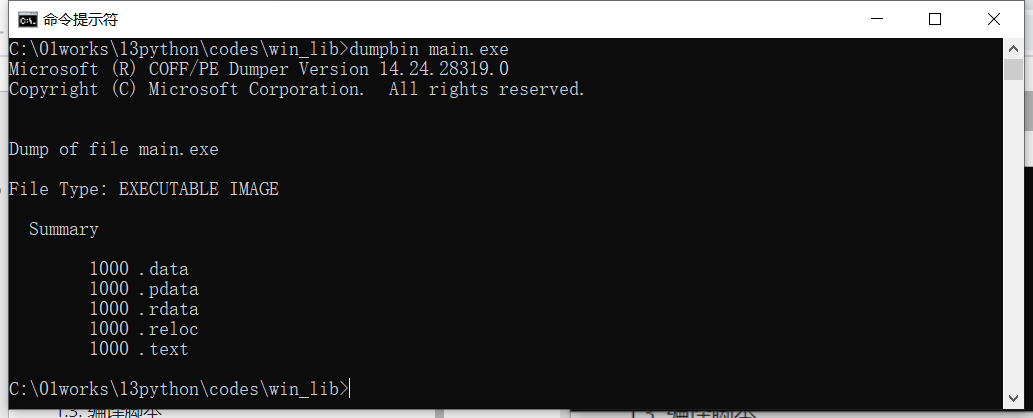

## 关于lib与dumpbin工具

- lib还有其他导出符号表等作用，后面再详细解释
- dumpbin对PE的动态库文件也可以导出；

------------------